<a href="https://colab.research.google.com/github/youngseo21/esaa_22/blob/main/pytorch_ch2_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B8%B0%EC%B4%88~ch3_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch로 시작하는 딥 러닝 입문
---
## ch2 파이토치 기초

### 1. 파이토치 패키지의 기본 구성
---
1. torch
2. torch.autograd
3. torch.nn
4. torch.optim
5. torch.utils.data
6. torch.onnx

### 2. 텐서 조작하기
---

In [1]:
import numpy as np

In [2]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
# 파이썬으로 설명하면 List를 생성해서 np.array로 1차원 array로 변환함.
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [3]:
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank of t:  1
Shape of t:  (7,)


+ (7, )는 (1, 7)을 의미합니다. 다시 말해 (1 × 7)의 크기를 가지는 벡터

In [4]:
import torch

In [6]:
# 1D with Pytorch
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [10]:
print(t.dim()) # rank. 즉 차원
print(t.shape) # shape 괄호 없이
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


In [11]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


In [12]:
# 2D with Pytorch
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [13]:
print(t.dim())  # rank. 즉, 차원
print(t.size()) # shape

2
torch.Size([4, 3])


In [14]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [15]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


+ 브로드케스팅

In [16]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [17]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]]) # (1,2) -> (2,2)
m2 = torch.FloatTensor([[3], [4]]) # (2,1) -> (2,2)
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


In [ ]:
# 브로드캐스팅 과정에서 실제로 두 텐서가 어떻게 변경되는지 보겠습니다.
[1, 2]
==> [[1, 2],
     [1, 2]]
[3]
[4]
==> [[3, 3],
     [4, 4]]

+ 자주 사용되는 기능들

In [18]:
# 행렬 곱셈과 곱셈의 차이(Matrix Multiplication Vs. Multiplication)
# 행렬 곱셈(.matmul) 
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [19]:
# 원소 별 곱셈(.mul)
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [20]:
# 평균 .mean()
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [21]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [22]:
print(t.mean()) # 4개의 원소의 평균인 2.5

tensor(2.5000)


In [23]:
print(t.mean(dim=0)) # 차원(dimension)을 인자로, dim=0이라는 것은 첫번째 차원

tensor([2., 3.])


In [ ]:
# 실제 연산 과정
t.mean(dim=0) #은 입력에서 첫번째 차원을 제거한다.

[[1., 2.],
 [3., 4.]]

1과 3의 평균을 구하고, 2와 4의 평균을 구한다.
결과 ==> [2., 3.]

In [24]:
print(t.mean(dim=1))

tensor([1.5000, 3.5000])


In [ ]:
# 실제 연산 결과는 (2 × 1)
[[1.5]
[3.5]]
# 하지만 (2 × 1)은 결국 1차원이므로 (1 × 2)와 같이 표현되면서 위와 같이 [1.5, 3.5]로 출력

In [25]:
print(t.mean(dim=-1))

tensor([1.5000, 3.5000])


In [26]:
# 덧셈 .sum()
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [28]:
# 최대(Max)와 아그맥스(ArgMax)
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

print(t.max()) # Returns one value: max
print(t.max(dim=0)) # Returns two values: max and argmax # . max에 dim 인자를 주면 argmax도 함께 리턴

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [29]:
print('Max: ', t.max(dim=0)[0]) # 0번 인덱스를 사용하면 max 값만
print('Argmax: ', t.max(dim=0)[1]) # 1번 인덱스를 사용하면 argmax 값만

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [30]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


  + 데이터사이언스 분야 한정으로 3차원 이상의 텐서는 그냥 다차원 행렬 또는 배열로 간주할 수 있습니다. 또한 주로 3차원 이상을 텐서라고 하긴 하지만, 1차원 벡터나 2차원인 행렬도 텐서라고 표현하기도 합니다. 같은 표현입니다. 벡터 = 1차원 텐서, 2차원 행렬 = 2차원 텐서, 그리고 3차원 텐서, 4차원 텐서, 5차원 텐서 등...

  + 훈련 데이터 하나의 크기를 256이라고 해봅시다. [3, 1, 2, 5, ...] 이런 숫자들의 나열이 256의 길이로 있다고 상상하면됩니다. 다시 말해 훈련 데이터 하나 = 벡터의 차원은 256입니다. 만약 이런 훈련 데이터의 개수가 3000개라고 한다면, 현재 전체 훈련 데이터의 크기는 3,000 × 256입니다. 행렬이니까 2D 텐서네요. 3,000개를 1개씩 꺼내서 처리하는 것도 가능하지만 컴퓨터는 훈련 데이터를 하나씩 처리하는 것보다 보통 덩어리로 처리합니다. 3,000개에서 64개씩 꺼내서 처리한다고 한다면 이 때 batch size를 64라고 합니다. 그렇다면 컴퓨터가 한 번에 처리하는 2D 텐서의 크기는 (batch size × dim) = 64 × 256입니다.

+ 텐서의 크기(shape)를 표현할 때는 ,(컴마)를 쓰기도 하고 ×(곱하기)를 쓰기도 합니다. 예를 들어 2행 3열의 2D 텐서를 표현할 때 (2, 3)라고 하기도 하고 (2 × 3)이라고 하기도 합니다. (5, )의 형식은 (1 × 5)를 의미합니다.

+ 훈련 데이터의 개수가 굉장히 많을 때, 컴퓨터가 한 번에 들고가서 처리할 양을 배치 크기(batch size)라고 합니다.

+ 슬라이싱에 대한 다른 예제 : https://wikidocs.net/13

+ Pytorch 텐서에 대한 다양한 예제 : https://datascienceschool.net/view-notebook/4f3606fd839f4320a4120a56eec1e228/

+ View - 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요!

In [31]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t) # 3차원 텐서

In [32]:
print(ft.shape)

torch.Size([2, 2, 3])


In [33]:
# 3차원 텐서에서 2차원 텐서로 변경
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape) # (2, 2, 3) -> (2 × 2, 3) -> (4, 3)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


+ view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 합니다.
+ ex.) 변경 전 텐서의 원소의 수는 (2 × 2 × 3) = 12개였습니다. 그리고 변경 후 텐서의 원소의 개수 또한 (4 × 3) = 12개
+ 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추합니다.

In [34]:
# 3차원 텐서의 크기 변경
# (2 × 2 × 3) 텐서를 (? × 1 × 3) 텐서로 변경
# (2 × 2 × 3) = (? × 1 × 3) = 12를 만족해야 하므로 ?는 4가 됩니다
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


+ 스퀴즈(Squeeze) - 1인 차원을 제거한다.

In [35]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [36]:
# 두번째 차원이 1이므로 squeeze를 사용하면 (3,)의 크기를 가지는 텐서로 변경
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


+ 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.

In [37]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [38]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [39]:
# view로도 구현 가능합니다. 2차원으로 바꾸고 싶으면서 첫번째 차원은 1이기를 원한다면 view에서 (1, -1)을 인자로 사용
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [40]:
print(ft.unsqueeze(1)) # 현재 크기는 (3,)이었으므로 두번째 차원에 1인 차원을 추가하면 (3, 1)의 크기를 가지게 됩니다
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [41]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


+ 타입 캐스팅(Type Casting)


+ 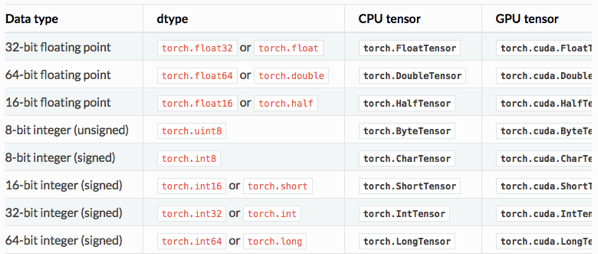 
+ 텐서에는 자료형이라는 것이 있습니다. 각 데이터형별로 정의되어져 있는데, 예를 들어 32비트의 부동 소수점은 torch.FloatTensor를, 64비트의 부호 있는 정수는 torch.LongTensor를 사용합니다. GPU 연산을 위한 자료형도 있습니다. 예를 들어 torch.cuda.FloatTensor가 그 예입니다.

In [42]:
lt = torch.LongTensor([1, 2, 3, 4]) #  long 타입
print(lt)

tensor([1, 2, 3, 4])


In [44]:
print(lt.float()) # .float()를 붙이면 바로 float형으로 타입이 변경

tensor([1., 2., 3., 4.])


In [46]:
bt = torch.ByteTensor([True, False, False, True]) # Byte 타입
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [47]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


+ 연결하기(concatenate)

In [48]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [49]:
# torch.cat([ ])를 통해 연결
print(torch.cat([x, y], dim=0)) # 두 개의 (2 × 2) 텐서가 (4 × 2) 텐서로

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [50]:
print(torch.cat([x, y], dim=1)) # 두 개의 (2 × 2) 텐서가 (2 × 4) 텐서로

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


+ 스택킹(Stacking)

In [51]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [53]:
print(torch.stack([x, y, z])) # 위 결과는 3개의 벡터가 순차적으로 쌓여 (3 × 2) 텐서가 됨

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [55]:
# x, y, z는 기존에는 전부 (2,)의 크기를 가졌습니다. 
# 그런데 .unsqueeze(0)을 하므로서 3개의 벡터는 전부 (1, 2)의 크기의 2차원 텐서로 변경됩니다. 
# 여기에 연결(concatenate)를 의미하는 cat을 사용하면 (3 x 2) 텐서가 됩니다.
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [56]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


+ ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서

In [57]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [58]:
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [59]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


+ In-place Operation (덮어쓰기 연산)

In [60]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [61]:
# 연산 뒤에 _를 붙이면 기존의 값을 덮어쓰기
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


### 3. 파이썬 클래스 Class
---
링크 : https://wikidocs.net/28

In [62]:
# 1. 함수(function)로 덧셈기 구현하기
result = 0
def add(num):
    global result 
    result += num
    return result
print(add(3))
print(add(4))

3
7


In [63]:
# 2. 함수(function)로 두 개의 덧셈기 구현하기
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


In [65]:
# 3. 클래스(class)로 덧셈기 구현하기
class Calculator:
    def __init__(self): # 객체 생성 시 호출될 때 실행되는 초기화 함수. 이를 생성자라고 한다.
        self.result = 0

    def add(self, num): # 객체 생성 후 사용할 수 있는 함수.
        self.result += num
        return self.result

+ 클래스는 마치 붕어빵 틀과 같아서 클래스를 생성한 후에는 이걸로 객체라는 것을 만들 수 있습니다. cal1이라는 객체를 만들겠습니다. 이는 붕어빵 틀로 하나의 붕어빵을 만드는 것에 비유됩니다.

In [66]:
cal1 = Calculator()

+ 객체의 생성 방법은 객체의 이름을 정한뒤에 '=클래스이름()'으로 객체를 생성합니다. 클래스가 붕어빵 틀과 같다는 이유는 하나의 클래스를 만든 후에는 여러 개의 객체를 만드는 것이 가능하기 때문입니다. 또 하나의 객체 cal2도 생성해보겠습니다.

In [67]:
cal2 = Calculator()

In [68]:
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


+ 두 개의 객체는 독립적으로 연산되고 있음을 알 수 있습니다. 앞에서는 이렇게 독립적인 두 개의 덧셈기를 함수로 구현하려고 했다면 함수를 두 개 만들어야 했지만, 클래스라는 것을 하나 선언하고, 이 클래스를 통해 별도의 객체를 생성하자 코드가 훨씬 간결해졌습니다.

## ch3. 선형회귀
---

+ H(x) = W*x + b

+ W는 가중치(weight), b는 편향(bias)
+ 비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)
+ 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 평균 제곱 오차(Mean Squared Error, MSE)
+ 비용 함수(Cost Function)의 값을 최소로 하는 W와 b를 찾는 방법: 옵티마이저 - 경사 하강법(Gradient Descent)
  + 기울기가 음수일 때 : W의 값이 증가
  + 기울기가 양수일 때 : W의 값이 감소
  + 학습률(learning rate) 알파: W의 값을 변경할 때, 얼마나 크게 변경할지를 결정

1. 기본 세팅

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [70]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

2. 변수 선언

In [71]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [72]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [73]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


3. 가중치와 편향의 초기화

In [83]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True)  # requires_grad=True: 학습을 통해 계속 값이 변경되는 변수임을 의미
# 가중치 W를 출력
print(W) 

tensor([0.], requires_grad=True)


In [84]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


4. 가설 세우기

In [85]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


5. 비용 함수 선언하기

In [86]:
# 앞서 배운 torch.mean으로 평균을 구한다.
cost = torch.mean((hypothesis - y_train) ** 2) 
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


6. 경사 하강법 구현하기

In [87]:
# 'SGD'는 경사 하강법의 일종입니다. lr은 학습률(learning rate)를 의미
optimizer = optim.SGD([W, b], lr=0.01)

In [88]:
# gradient를 0으로 초기화
optimizer.zero_grad()  # 기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있습니다

# 비용 함수를 미분하여 gradient 계산 (가중치 W와 편향 b에 대한 기울기가 계산)
cost.backward() 

# W와 b를 업데이트:  W와 b에서 리턴되는 변수들의 기울기에 학습률(learining rate) 0.01을 곱하여 빼줌으로서 업데이트
optimizer.step() 

7. 전체 코드

In [89]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

+ 에포크(Epoch)는 전체 훈련 데이터가 학습에 한 번 사용된 주기

+  optimizer.zero_grad()가 필요한 이유: 계속해서 미분값인 2가 누적되는 것을 볼 수 있습니다. 그렇기 때문에 optimizer.zero_grad()를 통해 미분값을 계속 0으로 초기화시켜줘야 합니다.

In [90]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


+ torch.manual_seed()를 하는 이유: 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있습니다. 그 이유는 torch.manual_seed()는 난수 발생 순서와 값을 동일하게 보장해준다는 특징때문입니다. 우선 랜덤 시드가 3일 때 두 번 난수를 발생시켜보고, 다른 랜덤 시드를 사용한 후에 다시 랜덤 시드를 3을 사용한다면 난수 발생값이 동일하게 나오는지 보겠습니다.

In [91]:
import torch

In [92]:
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


In [93]:
torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


In [94]:
torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


+ 텐서에는 requires_grad라는 속성이 있습니다. 이것을 True로 설정하면 자동 미분 기능이 적용됩니다. 선형 회귀부터 신경망과 같은 복잡한 구조에서 파라미터들이 모두 이 기능이 적용됩니다. requires_grad = True가 적용된 텐서에 연산을 하면, 계산 그래프가 생성되며 backward 함수를 호출하면 그래프로부터 자동으로 미분이 계산됩니다.

### 2. 자동 미분 Autograd
---
: 경사 하강법 코드를 보고있으면 requires_grad=True, backward() 등이 나옵니다. 이는 파이토치에서 제공하고 있는 자동 미분(Autograd) 기능을 수행하고 있는 것

In [95]:
import torch

In [97]:
w = torch.tensor(2.0, requires_grad=True) # 값이 2인 임의의 스칼라 텐서 w를 선언합니다. 이때 required_grad를 True로 설정

In [98]:
# 수식 정의
y = w**2
z = 2*y + 5

In [99]:
# 수식을 w에 대해서 미분해야합니다. .backward()를 호출하면 해당 수식의 w에 대한 기울기를 계산
z.backward()

In [100]:
# w.grad를 출력하면 w가 속한 수식을 w로 미분한 값이 저장
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


참고 자료 : https://tutorials.pytorch.kr/beginner/blitz/autograd_tutorial.html?highlight=autograd

자동 미분에 대한 유튜브 영상 : https://www.youtube.com/watch?v=E0R9Xf_GyUc

### 3. 다중 선형 회귀
---

In [101]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [102]:
torch.manual_seed(1)

In [103]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [104]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [105]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


+ 행렬 연산을 고려하여 파이토치로 구현하기

In [106]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [107]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [109]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True) # 가중치 W의 크기가 (3 × 1) 벡터
b = torch.zeros(1, requires_grad=True)

In [110]:
# 행렬곱으로 가설을 선언
hypothesis = x_train.matmul(W) + b

In [111]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

### 4. nn.Module로 구현하는 선형 회귀
---
+ 파이토치에서는 선형 회귀 모델이 nn.Linear()라는 함수로, 
+ 또 평균 제곱오차가 nn.functional.mse_loss()라는 함수로 구현되어져 있습니다.
```
import torch.nn as nn
model = nn.Linear(input_dim, output_dim)
```
```
import torch.nn.functional as F
cost = F.mse_loss(prediction, y_train)
```

+ 단순 선현 회귀 구현하기

In [113]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)

In [114]:
# 데이터: y=2x를 가정한 상태로 만든 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [115]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

In [117]:
# model에는 가중치 W와 편향 b가 저장되어져 있습니다. 이 값은 model.parameters()라는 함수를 사용하여 불러올 수 있다.
# 2개의 값이 출력되는데 첫번째 값이 W고, 두번째 값이 b에 해당됩니다. 두 값 모두 현재는 랜덤 초기화가 되어져 있습니다. 
# 그리고 두 값 모두 학습의 대상이므로 requires_grad=True가 되어져 있는 것을 볼 수 있습니다.
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [118]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [119]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [121]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 

# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산

# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


In [122]:
# 학습 후의 W와 b의 값을 출력
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


+ W의 값이 2에 가깝고, b의 값이 0에 가까운 것
+ H(x) 식에 입력 x로부터 예측된 y를 얻는 것을 forward 연산이라고 합니다.
+ 학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산입니다.
+ 학습 후, pred_y = model(new_var)는 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산입니다.
+ 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 합니다.
cost.backward()는 비용 함수로부터 기울기를 구하라는 의미이며 backward 연산입니다.

+ 다중 선형 회귀 구현하기

In [123]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)

In [124]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [125]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

In [126]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [127]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) # 학습률(learning rate)은 0.00001로 정합니다. 

In [128]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


In [129]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2305]], grad_fn=<AddmmBackward0>)


In [130]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html#tensorflow-static-graph

https://www.geeksforgeeks.org/linear-regression-using-pytorch/

https://www.yceffort.kr/2019/02/19/pytorch-02-linear-regression/

### 5. 클래스로 파이토치 모델 구현하기
---
+ 모델을 클래스로 구현하기
```
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)
```
```
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)
```
```
model = LinearRegressionModel()
````
+ 클래스(class) 형태의 모델은 `nn.Module` 을 상속받습니다. 
+ 그리고 `__init__()`에서 모델의 구조와 동작을 정의하는 생성자를 정의합니다. 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출됩니다. 
+ `super()` 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화 됩니다. 
+ `foward()` 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수입니다. 이 `forward()` 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행이됩니다. 예를 들어 model이란 이름의 객체를 생성 후, model(입력 데이터)와 같은 형식으로 객체를 호출하면 자동으로 forward 연산이 수행됩니다.

앞서 다중 선형 회귀 모델은 다음과 같이 구현했었습니다.

```
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)
```
```
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)
```
```
model = MultivariateLinearRegressionModel()
```

+ 단순 선형 회귀 클래스로 구현하기

In [131]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)

In [132]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [133]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [134]:
model = LinearRegressionModel()

In [135]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [136]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


+ 다중 선형 회귀 클래스로 구현하기

In [137]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)

In [138]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [139]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [140]:
model = MultivariateLinearRegressionModel()

In [141]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [142]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


### 6. 미니 배치와 데이터 로드(Mini Batch and Data Load)
---
1. 미니 배치와 배치 크기(Mini Batch and Batch Size): 
 + 미니 배치 학습을 하게되면 미니 배치만큼만 가져가서 미니 배치에 대한 대한 비용(cost)를 계산하고, 경사 하강법을 수행합니다. 그리고 다음 미니 배치를 가져가서 경사 하강법을 수행하고 마지막 미니 배치까지 이를 반복합니다. 이렇게 전체 데이터에 대한 학습이 1회 끝나면 1 에포크(Epoch)가 끝나게 됩니다.
 + 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만, 계산량이 너무 많이 듭니다. 미니 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠릅니다.
 + 배치 크기는 보통 2의 제곱수를 사용합니다. ex) 2, 4, 8, 16, 32, 64... 그 이유는 CPU와 GPU의 메모리가 2의 배수이므로 배치크기가 2의 제곱수일 경우에 데이터 송수신의 효율을 높일 수 있다고 합니다.
2. 이터레이션(Iteration)

 + 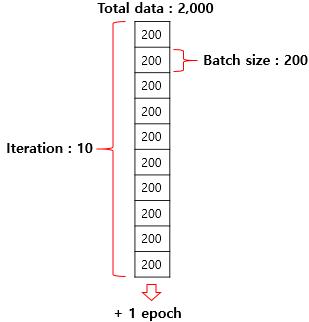
3. 데이터 로드하기(Data Load)
 + 파이토치에서는 데이터를 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 데이터셋(Dataset)과 데이터로더(DataLoader)를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것입니다.

In [143]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [144]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [145]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [146]:
dataset = TensorDataset(x_train, y_train)

+ 데이터로더는 기본적으로 2개의 인자를 입력받는다. 하나는 데이터셋, 미니 배치의 크기입니다. 이때 미니 배치의 크기는 통상적으로 2의 배수를 사용합니다. (ex) 64, 128, 256...) 
+ 그리고 추가적으로 많이 사용되는 인자로 shuffle이 있습니다. shuffle=True를 선택하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿉니다.

In [147]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [148]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [149]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 40394.078125
Epoch    0/20 Batch 2/3 Cost: 10625.847656
Epoch    0/20 Batch 3/3 Cost: 5451.569824
Epoch    1/20 Batch 1/3 Cost: 937.502686
Epoch    1/20 Batch 2/3 Cost: 265.944641
Epoch    1/20 Batch 3/3 Cost: 244.422516
Epoch    2/20 Batch 1/3 Cost: 3.523124
Epoch    2/20 Batch 2/3 Cost: 55.838848
Epoch    2/20 Batch 3/3 Cost: 2.371109
Epoch    3/20 Batch 1/3 Cost: 21.615038
Epoch    3/20 Batch 2/3 Cost: 1.536160
Epoch    3/20 Batch 3/3 Cost: 23.620941
Epoch    4/20 Batch 1/3 Cost: 12.848326
Epoch    4/20 Batch 2/3 Cost: 17.578579
Epoch    4/20 Batch 3/3 Cost: 18.382185
Epoch    5/20 Batch 1/3 Cost: 11.401794
Epoch    5/20 Batch 2/3 Cost: 20.961008
Epoch    5/20 Batch 3/3 Cost: 28.939528
Epoch    6/20 Batch 1/3 Cost: 14.807928
Epoch    6/20 Batch 2/3 Cost: 2.599214
Epoch    6/20 Batch 3/3 Cost: 33.501408
Epoch    7/20 Batch 1/3 Cost: 16.869902
Epoch    7/20 Batch 2/3 Cost: 24.529007
Epoch    7/20 Batch 3/3 Cost: 10.461083
Epoch    8/20 Batch 1/3 Cost: 8.6

In [150]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[157.2804]], grad_fn=<AddmmBackward0>)


배치 크기 이야기 : https://hongdoki.github.io/2017/10/07/optimization-difficulty-and-generlization-performance-as-batch-size-increases.html

클래스로 파이토치 모델 구현하는 것과 데이터 로드에 대한 설명 : https://www.youtube.com/watch?v=KXiDzNai9tI

### 7. 커스텀 데이터셋(Custom Dataset)
---
torch.utils.data.Dataset을 상속받아 직접 커스텀 데이터셋(Custom Dataset)을 만드는 경우도 있습니다. torch.utils.data.Dataset은 파이토치에서 데이터셋을 제공하는 추상 클래스입니다. Dataset을 상속받아 다음 메소드들을 오버라이드 하여 커스텀 데이터셋을 만들어보겠습니다.

커스텀 데이터셋을 만들 때, 일단 가장 기본적인 뼈대는 아래와 같습니다. 여기서 필요한 기본적인 define은 3개입니다.
```
class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self):

  def __len__(self):

  def __getitem__(self, idx): 
```

```
class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self):
  데이터셋의 전처리를 해주는 부분

  def __len__(self):
  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx): 
  데이터셋에서 특정 1개의 샘플을 가져오는 함수
```
+ len(dataset)을 했을 때 데이터셋의 크기를 리턴할 len
+ dataset[i]을 했을 때 i번째 샘플을 가져오도록 하는 인덱싱을 위한 get_item

+ 커스텀 데이터셋(Custom Dataset)으로 선형 회귀 구현하기

In [151]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [152]:
# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [153]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [154]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [155]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 40548.742188
Epoch    0/20 Batch 2/3 Cost: 7291.494629
Epoch    0/20 Batch 3/3 Cost: 1811.472290
Epoch    1/20 Batch 1/3 Cost: 1189.893066
Epoch    1/20 Batch 2/3 Cost: 401.466431
Epoch    1/20 Batch 3/3 Cost: 98.862206
Epoch    2/20 Batch 1/3 Cost: 59.924492
Epoch    2/20 Batch 2/3 Cost: 5.559007
Epoch    2/20 Batch 3/3 Cost: 0.005015
Epoch    3/20 Batch 1/3 Cost: 7.238708
Epoch    3/20 Batch 2/3 Cost: 0.579787
Epoch    3/20 Batch 3/3 Cost: 9.432348
Epoch    4/20 Batch 1/3 Cost: 2.596285
Epoch    4/20 Batch 2/3 Cost: 6.112614
Epoch    4/20 Batch 3/3 Cost: 0.173577
Epoch    5/20 Batch 1/3 Cost: 0.585848
Epoch    5/20 Batch 2/3 Cost: 3.764531
Epoch    5/20 Batch 3/3 Cost: 4.496256
Epoch    6/20 Batch 1/3 Cost: 1.750809
Epoch    6/20 Batch 2/3 Cost: 2.692096
Epoch    6/20 Batch 3/3 Cost: 4.092447
Epoch    7/20 Batch 1/3 Cost: 0.873122
Epoch    7/20 Batch 2/3 Cost: 3.545633
Epoch    7/20 Batch 3/3 Cost: 4.466667
Epoch    8/20 Batch 1/3 Cost: 2.943422
Epoch   

In [156]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.5625]], grad_fn=<AddmmBackward0>)
